In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import glob, os
import functools
sns.set_context('talk')

In [10]:
data_dir = '/raid/c-cuesta/tpcfs/'

In [11]:
# Load real space tpcf
list_dictionaries = []
os.chdir(data_dir + 'real/')
for real_tpcf in glob.glob("*.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries.append(pickle.load(input_file))

In [12]:
tpcfs = [dictionary['tpcf'] for dictionary in list_dictionaries]
mean_tpcf = np.mean(tpcfs, axis=0)
std_tpcf = np.std(tpcfs, axis=0)

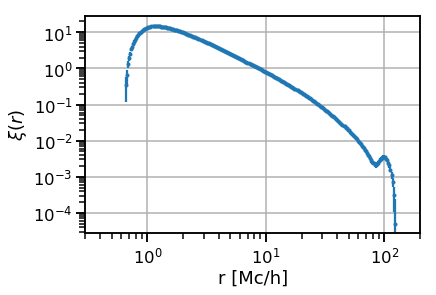

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(list_dictionaries[0]['r'],
            mean_tpcf, yerr = std_tpcf,
           marker = 'o', markersize = 3,
           linestyle='')
ax.set_xlabel("r [Mc/h]")
ax.set_ylabel(r"$\xi (r)$")
plt.grid()


In [6]:
# Load reshift space tpcf
list_dictionaries = []
os.chdir(data_dir + 'redshift/')
for real_tpcf in glob.glob("*.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries.append(pickle.load(input_file))

In [12]:
len(list_dictionaries)

14

Text(0.5, 0, 'r [Mpc/h]')

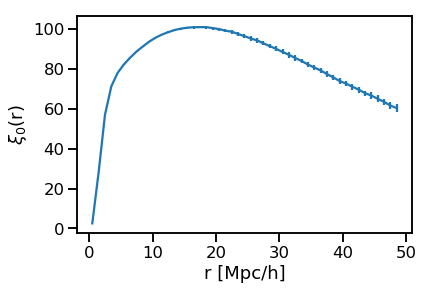

In [7]:
monopoles = [dictionary['mono'] for dictionary in list_dictionaries]
mean_mono = np.mean(monopoles, axis=0)
std_mono = np.std(monopoles, axis=0)

plt.errorbar(list_dictionaries[0]['r'], 
    list_dictionaries[0]['r'] * list_dictionaries[0]['r'] *mean_mono,
    yerr = list_dictionaries[0]['r']*list_dictionaries[0]['r']*std_mono)

plt.ylabel(r'$\xi_0 $(r)')
plt.xlabel(r'r [Mpc/h]')

Text(0.5, 0, 'r [Mpc/h]')

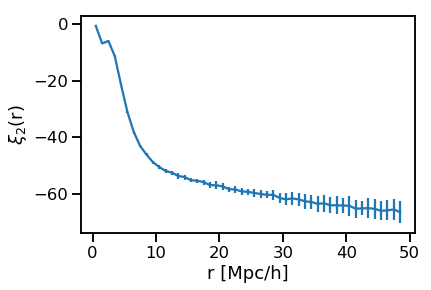

In [8]:
quadrupoles = [dictionary['quad'] for dictionary in list_dictionaries]
mean_quad = np.mean(quadrupoles, axis=0)
std_quad = np.std(quadrupoles, axis=0)

plt.errorbar(list_dictionaries[0]['r'], 
    list_dictionaries[0]['r'] * list_dictionaries[0]['r'] *mean_quad,
    yerr = list_dictionaries[0]['r']*list_dictionaries[0]['r']*std_quad)

plt.ylabel(r'$\xi_2 $(r)')
plt.xlabel(r'r [Mpc/h]')

Text(0.5, 0, 'r [Mpc/h]')

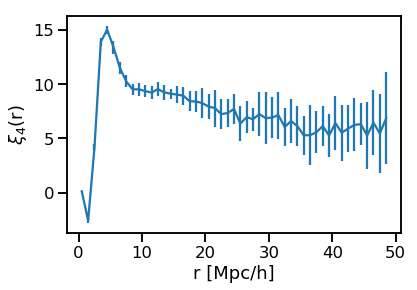

In [9]:
hexadecapoles = [dictionary['hexa'] for dictionary in list_dictionaries]
mean_hexa = np.mean(hexadecapoles, axis=0)
std_hexa = np.std(hexadecapoles, axis=0)

plt.errorbar(list_dictionaries[0]['r'], 
    list_dictionaries[0]['r'] * list_dictionaries[0]['r'] *mean_hexa,
    yerr = list_dictionaries[0]['r']*list_dictionaries[0]['r']*std_hexa)

plt.ylabel(r'$\xi_4 $(r)')
plt.xlabel(r'r [Mpc/h]')

In [10]:
pi_sigmas = [dictionary['pi_sigma'] for dictionary in list_dictionaries]
mean_pi_sigma = np.mean(pi_sigmas, axis=0)

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


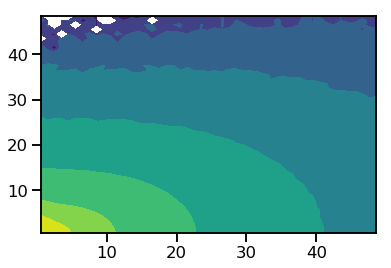

In [11]:
plt.contourf(list_dictionaries[0]['r'], 
            list_dictionaries[0]['r'], np.log10(mean_pi_sigma).T)